In [9]:

import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
#from data_processing import process_file
from scipy import signal
import poisson, detection

# Define the path to the file
file_path = "D:/DjangoCoding/NPAnalysisMapper/mysite/generated/linescan_100.csv"


In [10]:
def process_file(file_path, convertToCounts=True, medianFilterSize=51, gas_blank_start=0, gas_blank_end=0, number_of_pixels=20):
    # Read the file into a pandas dataframe
    df = pd.read_csv(file_path, skiprows=4, skipfooter=3)

    # Convert the dataframe to a numpy array
    array = df.to_numpy()

    # Convert the cps column to counts if necessary
    if convertToCounts:
        array[:,1] = array[:,1] * 0.0001

    # Crop the array based on the gas blank start and end values
    # Each second is 10000 data points (at dwell time of 0.1 ms)
    array = array[gas_blank_start*10000:array.shape[0]-gas_blank_end*10000,:]

    # Filter the data using a median filter with a window size of 51
    filtered_array = signal.medfilt(array[:,1], medianFilterSize)

    # Check if the background is less than 10 counts. If it is, use epsilon of 0.5
    # If the background is greater than 10 counts, use epsilon of 0 
    if np.mean(filtered_array) < 10:
        epsilon = 0.5
    else:
        epsilon = 0

    # Calculate the Sc and Sd values for the data set using the currie function. Use the epsilon value calculated above.
    # Each row in the Sc and Sd arrays corresponds to a row in the data set
    Sc, Sd = poisson.currie(filtered_array, epsilon=epsilon)

    # Use the Sc and Sd values to detect the peaks in the data
    detections, labels, regions = detection.accumulate_detections(array[:,1], Sc, Sd, integrate=True)

    # Obtain the peak areas for each peak
    peak_areas = np.zeros(regions.shape[0])

    for i in range(regions.shape[0]):
        peak_areas[i] = np.sum(array[regions[i,0]:regions[i,1],1])

    return (detections, labels, regions)

C:\Users\Dino64\AppData\Local\Temp\ipykernel_4584\1852415787.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(file_path, skiprows=4, skipfooter=3)


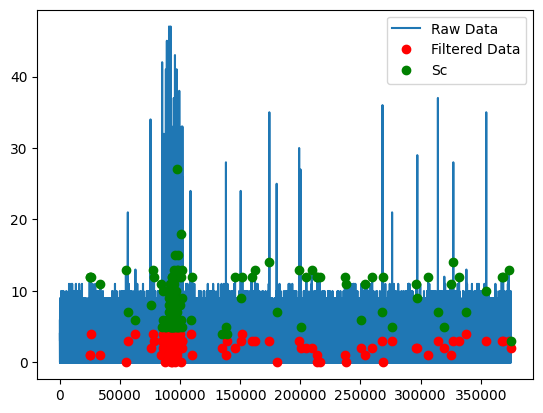

Detections: [ 7.64812636  8.32199548  7.64812636  7.32199548  8.13087824 35.59250544
 10.29625272 52.59250544  8.64812636  7.64812636  7.32199548 61.2406318
 46.59250544 43.94437908 42.59250544 60.2406318  48.59250544 39.88875816
 63.14069644 42.2406318  61.59250544 62.59250544 50.93197286 57.2406318
 50.59250544 46.2406318  43.2406318  46.2406318  63.59250544 47.59250544
 48.88875816 43.2406318  46.88875816 38.94437908 39.2406318  44.2406318
 39.3271956  49.2406318  34.94437908 32.53688452 29.65794456 44.88875816
 42.26175648 46.45807383 51.88875816 43.59250544 38.2406318  41.94437908
 52.88875816 58.53688452 60.59250544 60.88875816 50.65794456 42.65794456
 45.84444372 46.49257008 35.94437908 35.94437908 38.88875816 38.39263471
 58.2406318  42.59250544 34.2406318  28.94437908 45.2406318  34.94437908
 45.26175648 43.59250544 46.2406318  35.59250544 42.59250544  7.64812636
 50.7790046  50.88875816 37.2406318  42.58837003 49.88875816 48.59250544
 48.59250544 33.2406318  42.2406318  41.59

In [11]:
# Read the file into a numpy array
array = np.genfromtxt(file_path, delimiter=',', skip_header=4, skip_footer=3)
# filtered_array = signal.medfilt(array[:, 1], 51)

# if np.mean(filtered_array) < 10:
#     epsilon = 0.5
#     print('epsilon = 0.5')
# else:
#     epsilon = 0
#     print('epsilon = 0')

# Sc, Sd = poisson.currie(filtered_array, epsilon=epsilon)

# detections1, labels1, regions1 = detection.accumulate_detections(array[:,1], Sc, Sd, integrate=True)

# Call the process_file function
detections, labels, regions = process_file(file_path, convertToCounts=False)

# Crop the array. Remove the top 4 rows and the bottom 3 rows
# array = array[4:-3,:]

plt.plot(array[:, 0], array[:, 1])
#plt.plot(Sc, 'r--')
#plt.plot(Sd, 'g--')
plt.plot(array[regions[:, 0], 0], array[regions[:, 0], 1], 'ro')
plt.plot(array[regions[:, 1], 0], array[regions[:, 1], 1], 'go')
plt.legend(['Raw Data', 'Filtered Data', 'Sc', 'Sd', 'Start', 'End'])
plt.show()

print("Detections:", detections)
print("Regions:", regions)

In [18]:
print(np.shape(regions))
print(np.shape(detections))
print(np.shape(labels))

# Create a new array, n x 2 where n is the number of peaks detected. 
# The first column is the first column from the regions array, and the second column is the detections array

new_array = np.zeros((regions.shape[0], 2))
new_array[:, 0] = regions[:, 0]
new_array[:, 1] = detections

# Print the new array
print(new_array)

(122, 2)
(122,)
(374997,)
[[2.47700000e+04 7.64812636e+00]
 [2.52570000e+04 8.32199548e+00]
 [2.55440000e+04 7.64812636e+00]
 [3.36720000e+04 7.32199548e+00]
 [5.48830000e+04 8.13087824e+00]
 [5.65080000e+04 3.55925054e+01]
 [6.28130000e+04 1.02962527e+01]
 [7.53670000e+04 5.25925054e+01]
 [7.70700000e+04 8.64812636e+00]
 [7.83020000e+04 7.64812636e+00]
 [8.40500000e+04 7.32199548e+00]
 [8.50500000e+04 6.12406318e+01]
 [8.55960000e+04 4.65925054e+01]
 [8.59590000e+04 4.39443791e+01]
 [8.76690000e+04 4.25925054e+01]
 [8.81610000e+04 6.02406318e+01]
 [8.83920000e+04 4.85925054e+01]
 [8.87510000e+04 3.98887582e+01]
 [8.89670000e+04 6.31406964e+01]
 [9.05680000e+04 4.22406318e+01]
 [9.07720000e+04 6.15925054e+01]
 [9.09000000e+04 6.25925054e+01]
 [9.12220000e+04 5.09319729e+01]
 [9.12990000e+04 5.72406318e+01]
 [9.13620000e+04 5.05925054e+01]
 [9.17330000e+04 4.62406318e+01]
 [9.19870000e+04 4.32406318e+01]
 [9.20230000e+04 4.62406318e+01]
 [9.20640000e+04 6.35925054e+01]
 [9.22560000e+04 

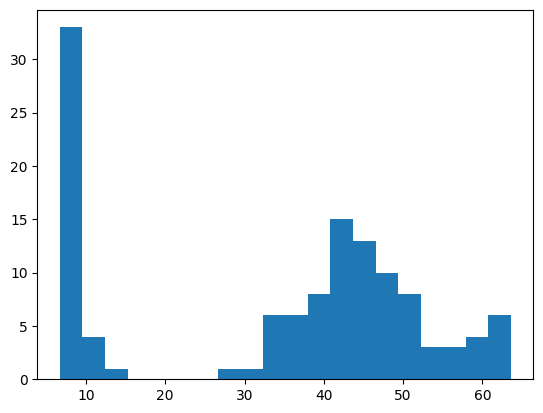

In [13]:
# Create a histogram of the peak areas

plt.hist(detections, bins=20)
plt.show()

In [1]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Define input and output directories
input_folder = "D:/Washout Gent/11-06-2023 Output/E2/20Hz"
output_folder = "D:/Washout Gent/11-06-2023 Output/E2 Img/20Hz"

# Get a list of all the files in the input folder ending with .csv
file_list = [f for f in os.listdir(input_folder) if f.endswith('.csv')]

# Define the colormap
cmap = plt.get_cmap('plasma')

for file in file_list:
    # Read the file into a numpy array
    array = np.genfromtxt(os.path.join(input_folder, file), delimiter=',', skip_header=4, skip_footer=3)
    
    # Upscale the array 10x
    upscaled_array = np.repeat(np.repeat(array, 10, axis=0), 10, axis=1)
    
    # Normalize the array to 0-1
    normalized_array = upscaled_array / np.max(upscaled_array)
    
    # Apply the colormap
    colored_array = cmap(normalized_array)
    
    # Convert the colored array into a PIL Image object
    img = Image.fromarray((colored_array[:, :, :3] * 255).astype(np.uint8))
    
    # Save the image as a PNG file in the output folder
    img.save(os.path.join(output_folder, f"{os.path.splitext(file)[0]}.png"))

In [9]:
# Rename all files in a folder so that they have leading zeros in the names.

import os

# Define the folder path
folder_path = "D:/Washout Gent/11-06-2023 Output/E2 Img/50Hz glass-to-gel"

# Get a list of all the files in the folder
file_list = os.listdir(folder_path)

# Loop through the files
for file in file_list:
    print(f"Processing file: {file}")
    
    # Split the filename into the name and extension
    name, ext = os.path.splitext(file)
    print(f"Name: {name}, Extension: {ext}")
    
    # Split the name into the prefix and number
    prefix, number = name.split('_')
    print(f"Prefix: {prefix}, Number: {number}")
    
    # Add leading zeros to the prefix
    prefix = prefix.zfill(3)
    print(f"Prefix with leading zeros: {prefix}")
    
    # Join the prefix and number
    new_name = prefix + '_' + number + ext
    print(f"New name: {new_name}")
    
    # Rename the file
    os.rename(os.path.join(folder_path, file), os.path.join(folder_path, new_name))

Processing file: 100_[104Pd]+.png
Name: 100_[104Pd]+, Extension: .png
Prefix: 100, Number: [104Pd]+
Prefix with leading zeros: 100
New name: 100_[104Pd]+.png
Processing file: 101_[104Ru]+.png
Name: 101_[104Ru]+, Extension: .png
Prefix: 101, Number: [104Ru]+
Prefix with leading zeros: 101
New name: 101_[104Ru]+.png
Processing file: 102_[105Pd]+.png
Name: 102_[105Pd]+, Extension: .png
Prefix: 102, Number: [105Pd]+
Prefix with leading zeros: 102
New name: 102_[105Pd]+.png
Processing file: 103_[106Pd]+.png
Name: 103_[106Pd]+, Extension: .png
Prefix: 103, Number: [106Pd]+
Prefix with leading zeros: 103
New name: 103_[106Pd]+.png
Processing file: 104_[106Cd]+.png
Name: 104_[106Cd]+, Extension: .png
Prefix: 104, Number: [106Cd]+
Prefix with leading zeros: 104
New name: 104_[106Cd]+.png
Processing file: 105_[107Ag]+.png
Name: 105_[107Ag]+, Extension: .png
Prefix: 105, Number: [107Ag]+
Prefix with leading zeros: 105
New name: 105_[107Ag]+.png
Processing file: 106_[108Pd]+.png
Name: 106_[108Pd]+